3. Feature Engineering

모델 정확도를 높이기 위해서 주어진 데이터를 예측 모델의 문제를 잘 표현할 수 있는 features로 변형시키는 과정 / 머신러닝 알고리즘을 작동하기 위해 데이터의 도메인 지식을 활용해 feature를 만드는 과정  

* features : 모델에 입력하여서 나중에 예측하는 데 사용되는 변수열

In [1]:

import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# plt.style.use('seaborn-colorblind')
# %matplotlib inline
#from feature_cleaning import rare_values as ra

In [15]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('../data/train.csv', usecols=use_cols)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


In [16]:
# Note that we include target variable in the X_train 
# because we need it to supervise our discretization
# this is not the standard way of using train-test-split
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

3.1 Feature Scaling

서로 다른 변수(feature)의 값 범위를 일정한 수준으로 맞추는 작업. (ex) 토익, 수능 영어 점수 예시

변수 값의 범위 또는 단위가 달라서 발생 가능한 문제를 예방할 수 있음 -> 머신러닝 모델이 특정한 데이터의 편향성을 갖는 걸 방지할 수 있다. (ex) scaling을 하지 않는다면 더 넓은 범위의 값을 가지는 feature가 거리를 계산하는 주된 기준이 되어 버림.

그래서 거리를 계산하는 KNN이나 경사 하강법, Clustering에 유용하게 쓰임. (위의 예시가 이유)

* 경사 하강법 : https://hi-guten-tag.tistory.com/205
* 경사 하강법에서 Feature Scaling이 유용하게 쓰이는 이유 : https://dodonam.tistory.com/376 (최소 비용 지점은 원이나 타원형의 중앙)

Normalization - Standardization (정균화-표준화) (Z-점수 조정)

평균을 제거하고 단위 분산으로 데이터의 척도를 조정함.

장점 : 표준 정규 분포를 갖도록 재조정해 scale이 큰 feature의 영향이 비대해지는 것을 방지.
단점 : 변수가 왜곡되거나 이상값이 있는 경우 좁은 범위의 관측값을 압축하여 예측력을 손상시킴


* 표준정규분포 : 평균이 0, 분산이 1인 분포.
* 정규화 : 데이터 분포를 0과 1 사이의 범위로 이동하고 재조정시키는 방법. 
* 표준화 :  데이터의 범위를 평균 0 분산 1이 되도록 바꿔주는 것, 측정 값에서 평균을 빼고 표준편차로 나눔.
* Z-점수 : 데이터를 표준화한 값.

In [17]:
# 새로운 feature 생성
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train[['Fare']]) #정규, 표준화
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_zscore
857         1       1    male  51.0      0  26.5500    -0.122530
52          1       1  female  49.0      1  76.7292     0.918124
386         0       3    male   1.0      5  46.9000     0.299503
124         0       1    male  54.0      0  77.2875     0.929702
578         0       3  female   NaN      1  14.4583    -0.373297
549         1       2    male   8.0      1  36.7500     0.089005


* .fit() : 모델을 학습시키는 함수.

In [19]:
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std()) #std : 표준 편차 계산

5.417460665907666e-17
1.000803535686101


Min-Max scaling

각 feature의 크기를 지정된 범위로 조정하여 feature를 변환함. 기본값은 [0,1].

X_scaled = (X - X.min / (X.max - X.min))

단점 : 변수가 왜곡되거나 이상값이 있는 경우 좁은 범위의 관측값을 압축하여 예측력을 손상시킴.

In [20]:
# add the new created feature
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(X_train[['Fare']]) #최대, 최소화
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_minmax
857         1       1    male  51.0      0  26.5500     0.051822
52          1       1  female  49.0      1  76.7292     0.149765
386         0       3    male   1.0      5  46.9000     0.091543
124         0       1    male  54.0      0  77.2875     0.150855
578         0       3  female   NaN      1  14.4583     0.028221
549         1       2    male   8.0      1  36.7500     0.071731


In [21]:
# check the range of Fare_minmax
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

1.0
0.0


Robust scaling

이상치의 영향을 최소하한 기법. 중앙값과 IQR을 사용하기 때문에 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인할 수 있음.

X_scaled = (X - X의 중앙값) / IQR

* IQR : Q3 - Q1 (75퍼센타일 - 25퍼센타일) / 4분위 수 이용

장점 : 왜곡된 변수에 대한 변환 후 변수의 확산을 더 잘 보존함.

In [ ]:
# add the new created feature
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(X_train[['Fare']]) #Robust scaling
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

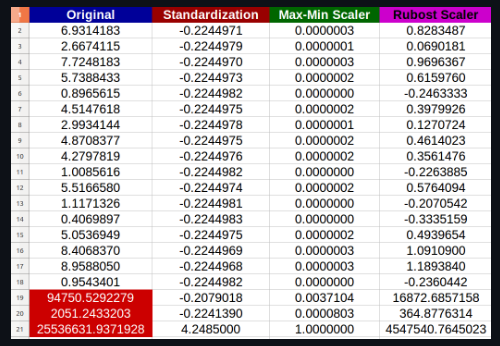

정규화-표준화, 최대-최소 방법은 대부분의 데이터를 좁은 범위로 압축

Robust는 처리된 결과에서 이상치를 제거할 수 없지만 데이터의 확산을 유지하는데 효과적임.

왜곡된 분포 또는 이상값이 있는 경우 정규화-표준화 방법을 사용하는 것은 좋지 않음.

3.2 이산화

* 이산화 : 변수 값의 범위에 걸쳐 일련의 연속 간격을 생성하여 연속 변수를 이산 변수로 변환하는 것.

* 이산화에 대한 구체적 설명 : https://velog.io/@nata0919/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EC%82%B0%ED%99%94Discretisation-%EC%A0%95%EB%A6%AC

Equal width binning

가능한 값의 범위를 동일한 너비의 N개의 빈으로 나눔. 한 개의 분할 안에 들어가는지와 무관하게 전체 범위에 대해 N분할 적용. (ex) 절대평가

width = (max-min)/N

단점 : 왜곡된 분포에 민감

In [23]:
from sklearn.preprocessing import KBinsDiscretizer
enc_equal_width = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit(X_train[['Fare']])

# equal width for every bins
enc_equal_width.bin_edges_

array([array([  0.    , 170.7764, 341.5528, 512.3292])], dtype=object)

In [24]:
result = enc_equal_width.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0
0.0    610
1.0     11
2.0      2
Name: count, dtype: int64

In [25]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_width'] = enc_equal_width.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_width
857         1       1    male  51.0      0   26.5500               0.0
52          1       1  female  49.0      1   76.7292               0.0
386         0       3    male   1.0      5   46.9000               0.0
124         0       1    male  54.0      0   77.2875               0.0
578         0       3  female   NaN      1   14.4583               0.0
549         1       2    male   8.0      1   36.7500               0.0
118         0       1    male  24.0      0  247.5208               1.0
12          0       3    male  20.0      0    8.0500               0.0
157         0       3    male  30.0      0    8.0500               0.0
127         1       3    male  24.0      0    7.1417               0.0


Equal frequency binning (등빈도 비닝)

빈도를 기준으로 범위를 나눔. 연속형 변수를 동일한 구간으로 정렬하는데, 각 분할 안에 동일한 개수의 관측값이 들어감. 따라서 각 간격의 너비는 계산한 특정 분위수를 기반으로 함.

* 분위수 : 확률분포에서 확률변수의 구간을 나누는 기준.

In [26]:
enc_equal_freq = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile').fit(X_train[['Fare']])
# check the bin edges
enc_equal_freq.bin_edges_

array([array([  0.        ,   8.69303333,  26.2875    , 512.3292    ])],
      dtype=object)

In [27]:
# equal number of case for every bins
result = enc_equal_freq.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0
2.0    209
0.0    208
1.0    206
Name: count, dtype: int64

In [28]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_freq'] = enc_equal_freq.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_freq
857         1       1    male  51.0      0   26.5500              2.0
52          1       1  female  49.0      1   76.7292              2.0
386         0       3    male   1.0      5   46.9000              2.0
124         0       1    male  54.0      0   77.2875              2.0
578         0       3  female   NaN      1   14.4583              1.0
549         1       2    male   8.0      1   36.7500              2.0
118         0       1    male  24.0      0  247.5208              2.0
12          0       3    male  20.0      0    8.0500              0.0
157         0       3    male  30.0      0    8.0500              0.0
127         1       3    male  24.0      0    7.1417              0.0


K-means binning

유사한 관찰을 구룹화하는 빈을 생성하기 위해 k-mean과 같은 클러스터링 알고리즘을 사용할 수 있음.

* k-means 클러스터링 : 사전에 클러스터 개수 k와 초기값을 입력하면 각 데이터의 그룹을 할당해 나가는 알고리즘

단점 : 하이퍼 매개변수 조정이 필요함.

In [29]:
enc_kmeans = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans').fit(X_train[['Fare']])
# check the bin edges
enc_kmeans.bin_edges_

c:\Users\wooka\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([array([  0.        ,  93.5271531 , 338.08506324, 512.3292    ])],
      dtype=object)

In [30]:
result = enc_kmeans.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0
0.0    587
1.0     34
2.0      2
Name: count, dtype: int64

In [31]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_kmeans'] = enc_kmeans.transform(X_train[['Fare']])
print(X_train_copy.head(10))


     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_kmeans
857         1       1    male  51.0      0   26.5500          0.0
52          1       1  female  49.0      1   76.7292          0.0
386         0       3    male   1.0      5   46.9000          0.0
124         0       1    male  54.0      0   77.2875          0.0
578         0       3  female   NaN      1   14.4583          0.0
549         1       2    male   8.0      1   36.7500          0.0
118         0       1    male  24.0      0  247.5208          1.0
12          0       3    male  20.0      0    8.0500          0.0
157         0       3    male  30.0      0    8.0500          0.0
127         1       3    male  24.0      0    7.1417          0.0
